# Kata Kunci Berita


Mencari dokumen melalui kata kunci dapat mempermudah kita dalam mencari suatu dokumen yang relevan. Kata Kunci merupakan kata yang penting dan sering muncul dalam sebuah teks maupun dokumen. Biasanya kata kunci mengandung kata yang unik, dan bermakna spesifik.


## Proses Pembersihan Teks


### Import Library


In [1]:
# Library untuk text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Library untuk data manipulation
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Library untuk text similarity
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [2]:
data = pd.read_csv('../tugas1/data_100.csv')
data

,judul,tanggal,isi,kategori
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional
...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional


### Preprocessing Text


In [3]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r"[^a-zA-Z : .]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

Membersihkan text dari tanda baca yang ada, kemudian menyesuaikan text agar bisa diolah lebih lanjut.


In [4]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

data['cleaned_news'] = preprocess_text(data['isi'])
data

100%|██████████| 100/100 [00:00<00:00, 160.02it/s]


,judul,tanggal,isi,kategori,cleaned_news
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional,agresi israel gaza oktober warga palestina ter...
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional,agresi israel jalur gaza memasuki senin . rent...
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional,kepala pasukan brigade alquds iran esmail qaan...
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional,ledakan bandara internasional karachi pakistan...
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional,pasukan pertahanan israel idf bersiaga ketat p...
...,...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional,perang yelyel pendukung calon gubernur dki jak...
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional,calon gubernur jalur independen dharma pongrek...
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional,calon gubernur jakarta pramono anung berjanji ...
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional,calon gubernur jakarta ridwan kamil mengungkap...


### Memisahkan Kalimat menjadi per Kata


In [5]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace('.', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

In [6]:
kalimat

['pasukan pertahanan israel idf bersiaga ketat perbatasan menjelang agresi jalur gaza palestina minggu ',
 'idf bersiaga mengantisipasi serangan kelompok milisi hamas palestina senin peringatan konflik oktober ',
 'the times of israel melaporkan idf memperkuat pasukan perbatasan mengantisipasi serangan roket jarak ditembakkan gaza ',
 'sumber militer percaya hamas serangan roket operasinya ditumpas israel ',
 'komando selatan pertahanan serangan skenario bulanbulan bersamaan acara peringatan dilaksanakan aman pernyataan idf ',
 'militer hamas menembakkan roket gaza perbatasan israel ',
 'militer memperkuat pertahanan perbatasan gaza koridor netzarim lokasi pendudukan idf ',
 'kompi dilaporkan dikerahkan menjaga kotakota perbatasan zionis ',
 'kewaspadaan ',
 'tingkat kesiapan tindakan ofensif kepala komando selatan yaron finkelman ',
 'sabtu malam juru bicara idf daniel hagari mewantiwanti warga sipil berhatihati ',
 'meningkatkan pasukan mengantisipasi ',
 'agresi israel gaza senin me

In [7]:
kata

['palestina',
 'memperkuat',
 'warga',
 'sumber',
 'perbatasan',
 'kotakota',
 'berkumpul',
 'oktober',
 'senin',
 'menggelar',
 'milisi',
 'malam',
 'peringatan',
 'jarak',
 'ofensif',
 'israel',
 'pernyataan',
 'pemerintah',
 'tewas',
 'lokasi',
 'kunjung',
 'diluncurkan',
 'acara',
 'selatan',
 'dikerahkan',
 'ketat',
 'meningkatkan',
 'yarkon',
 'ditembakkan',
 'pasukan',
 'konflik',
 'memasuki',
 'of',
 'aviv',
 'koridor',
 'komando',
 'hagari',
 'yaron',
 'pasca',
 'disandera',
 'kewaspadaan',
 'sipil',
 'ditumpas',
 'tel',
 'operasinya',
 'minggu',
 'senjata',
 'bersamaan',
 'percaya',
 'dikabarkan',
 'terbatas',
 'menembakkan',
 'dilaksanakan',
 'melukai',
 'mewantiwanti',
 'kelompok',
 'melaporkan',
 'idf',
 'pendudukan',
 'orang',
 'bulanbulan',
 'serangan',
 'skenario',
 'gaza',
 'tingkat',
 'bicara',
 'jalur',
 'bersiaga',
 'hamas',
 'ditawan',
 'penyanderaan',
 'the',
 'kesiapan',
 'juru',
 'meninggal',
 'agresi',
 'dilaporkan',
 'sabtu',
 'gencatan',
 'zionis',
 'menjelan

## Membuat Matriks


### Occurrence matrix


Menghitung frekuensi kemunculan kata dalam kumpulan teks.


In [8]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)
	
	for i, sent in enumerate(data):
		# Tokenisasi kalimat menjadi kata-kata
		kata_kalimat = word_tokenize(sent)
		
		# Hitung frekuensi setiap kata dalam kalimat
		for word in kata_kalimat:
			if word in kata:
				vektor_kata.at[i, word] += 1

	return vektor_kata

In [9]:
df_vektor_kata = vektor_kata(kalimat)
df_vektor_kata

,palestina,memperkuat,warga,sumber,perbatasan,kotakota,berkumpul,oktober,senin,menggelar,...,upacara,catatan,daniel,diyakini,militer,roket,menyepakati,mengantisipasi,kepala,aman
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
6,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Hasil Kata Kunci


In [10]:
sorted_kata = df_vektor_kata.sum().sort_values(ascending=False)[:3]
print(", ".join(sorted_kata.index))

israel, hamas, idf


### Co-occurrence Matrix


Co-occurrence adalah konsep dalam analisis teks yang mengukur seberapa sering dua kata atau lebih muncul bersama-sama dalam suatu konteks tertentu, seperti dalam kalimat, paragraf, atau dokumen.


In [11]:
def create_cooccurrence_matrix(data):
	vektor_kata = pd.DataFrame(0, index=kata, columns=kata)

	for sent in data:
		kata_kalimat = word_tokenize(sent)
		for i in range(len(kata_kalimat)-1):
			vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1
			vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1
	
	return vektor_kata

cooccurrence_matrix = create_cooccurrence_matrix(kalimat)
cooccurrence_matrix

,palestina,memperkuat,warga,sumber,perbatasan,kotakota,berkumpul,oktober,senin,menggelar,...,upacara,catatan,daniel,diyakini,militer,roket,menyepakati,mengantisipasi,kepala,aman
palestina,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
memperkuat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
warga,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sumber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
perbatasan,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
roket,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
menyepakati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mengantisipasi,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kepala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cosine Similarity


In [12]:
cossim = cosine_similarity(cooccurrence_matrix)

#### Graph


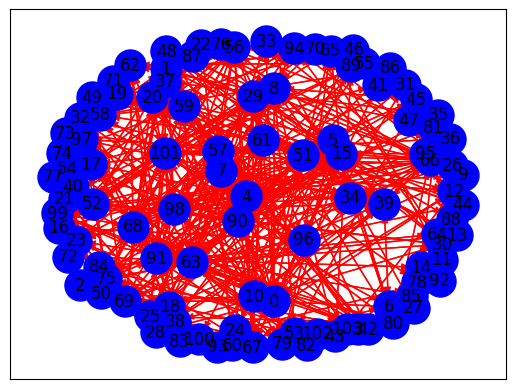

In [13]:
G = nx.DiGraph()
for i in range(len(cossim)):
    G.add_node(i)

for i in range(len(cossim)):
    for j in range(len(cossim)):
        similarity = cossim[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G, k=2)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [14]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 15: 0.0404
Node 63: 0.0321
Node 68: 0.0303
Node 91: 0.0285
Node 4: 0.0258
Node 0: 0.0244
Node 8: 0.0242
Node 61: 0.0216
Node 57: 0.0199
Node 66: 0.0189
Node 1: 0.0183
Node 56: 0.0180
Node 101: 0.0179
Node 29: 0.0159
Node 98: 0.0150
Node 99: 0.0147
Node 59: 0.0142
Node 48: 0.0142
Node 51: 0.0142
Node 39: 0.0137
Node 12: 0.0136
Node 20: 0.0131
Node 32: 0.0131
Node 69: 0.0126
Node 7: 0.0121
Node 42: 0.0119
Node 5: 0.0113
Node 30: 0.0112
Node 10: 0.0111
Node 90: 0.0111
Node 94: 0.0111
Node 23: 0.0111
Node 17: 0.0110
Node 75: 0.0110
Node 67: 0.0110
Node 80: 0.0110
Node 2: 0.0106
Node 38: 0.0104
Node 65: 0.0103
Node 34: 0.0102
Node 25: 0.0100
Node 58: 0.0097
Node 96: 0.0096
Node 9: 0.0096
Node 22: 0.0096
Node 16: 0.0094
Node 52: 0.0091
Node 79: 0.0089
Node 28: 0.0088
Node 62: 0.0088
Node 84: 0.0085
Node 70: 0.0081
Node 33: 0.0077
Node 6: 0.0076
Node 14: 0.0075
Node 35: 0.0075
Node 55: 0.0072
Node 31: 0.0068
Node 45: 0.0068
Node 53: 0.0068
Node 102: 0.0064
Node 93: 0.0062
Nod

#### Hasil Kata Kunci


In [15]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 15: Page Rank = 0.0404
Kalimat: israel
Node 63: Page Rank = 0.0321
Kalimat: gaza
Node 68: Page Rank = 0.0303
Kalimat: hamas
